In [1]:
import pickle
import numpy as np

In [6]:
with open("train_qa.txt", "rb") as fp:   # Unpickling
    train_data =  pickle.load(fp)
train_data

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [7]:
with open("test_qa.txt", "rb") as fp:   # Unpickling
    test_data =  pickle.load(fp)
test_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [8]:
type(train_data)

list

In [9]:
type(test_data)

list

In [10]:
len(train_data)

10000

In [11]:
len(test_data)

1000

In [12]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [13]:
' '.join(train_data[0][1])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [14]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [15]:
train_data[0][2]

'no'

In [16]:
vocab = set()

In [17]:
all_data = test_data + train_data

In [18]:
for story,question,answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [19]:
vocab.add('no')
vocab.add('yes')
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [20]:
vocab_len = len(vocab) + 1 #we add an extra space to hold a 0 for Keras's pad_sequences
max_story_len = max([len(data[0]) for data in all_data])
max_story_len

156

In [21]:
max_question_len = max([len(data[1]) for data in all_data])
max_question_len

6

In [23]:
#VECTORIZING
# Reserve 0 for pad_sequences
vocab_size = len(vocab) + 1
vocab_size

38

In [24]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [26]:
# integer encode sequences of words
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)
tokenizer.word_index

{'sandra': 1,
 'mary': 2,
 'picked': 3,
 'hallway': 4,
 'down': 5,
 'the': 6,
 'took': 7,
 'grabbed': 8,
 'in': 9,
 'there': 10,
 'is': 11,
 'travelled': 12,
 'john': 13,
 'up': 14,
 'put': 15,
 '?': 16,
 'daniel': 17,
 'journeyed': 18,
 'no': 19,
 'dropped': 20,
 'yes': 21,
 'to': 22,
 'got': 23,
 'left': 24,
 'bedroom': 25,
 'office': 26,
 'football': 27,
 'milk': 28,
 'went': 29,
 'discarded': 30,
 'apple': 31,
 'moved': 32,
 'bathroom': 33,
 'kitchen': 34,
 '.': 35,
 'back': 36,
 'garden': 37}

In [38]:
train_story_text = []
train_question_text = []
train_answers = []

for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
train_story_seq = tokenizer.texts_to_sequences(train_story_text)


In [41]:
len(train_story_text)

10000

In [42]:
len(train_story_seq)

10000

In [43]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len,max_question_len=max_question_len):


    '''' OUTPUT:

    Vectorizes the stories,questions, and answers into padded sequences. We
    first loop for every story, query , and answer in the data. Then we convert the raw words to an word index value.
    Then we append each set to their appropriate output list.

     Then once we have converted the words to numbers, we pad the sequences so they are all of equal length.

    Returns this in the form of a tuple (X,Xq,Y) (padded based on max lengths)
    ''''
    # X = STORIES
    X = []
    # Xq = QUERY/QUESTION
    Xq = []
    # Y = CORRECT ANSWER
    Y = []


    for story, query, answer in data:

        # Grab the word index for every word in story
        x = [word_index[word.lower()] for word in story]
        # Grab the word index for every word in query
        xq = [word_index[word.lower()] for word in query]

        # Grab the Answers (either Yes/No so we don't need to use list comprehension here)
        # Index 0 is reserved so we're going to use + 1
        y = np.zeros(len(word_index) + 1)
        # Now that y is all zeros and we know its just Yes/No , we can use numpy logic to create this assignment
        #
        y[word_index[answer]] = 1

        # Append each set of story,query, and answer to their respective holding lists
        X.append(x)
        Xq.append(xq)
        Y.append(y)

    # Finally, pad the sequences based on their max length so the RNN can be trained on uniformly long sequences.

    # RETURN TUPLE FOR UNPACKING
    return (pad_sequences(X, maxlen=max_story_len),pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [46]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)
inputs_test, queries_test, answers_test = vectorize_stories(test_data)
inputs_test

array([[ 0,  0,  0, ...,  6, 25, 35],
       [ 0,  0,  0, ...,  6, 37, 35],
       [ 0,  0,  0, ...,  6, 37, 35],
       ...,
       [ 0,  0,  0, ...,  6, 31, 35],
       [ 0,  0,  0, ...,  6, 37, 35],
       [ 0,  0,  0, ..., 31, 10, 35]], dtype=int32)

In [47]:
queries_test

array([[11, 13,  9,  6, 34, 16],
       [11, 13,  9,  6, 34, 16],
       [11, 13,  9,  6, 37, 16],
       ...,
       [11,  2,  9,  6, 25, 16],
       [11,  1,  9,  6, 37, 16],
       [11,  2,  9,  6, 37, 16]], dtype=int32)

In [48]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 503.,   0., 497.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [50]:
tokenizer.word_index['yes']

21

In [51]:
tokenizer.word_index['no']

19

In [61]:
from keras.models import Sequential, Model
from keras.layers import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM

In [59]:
!apt-get install keras.layers.embeddings

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package keras.layers.embeddings
E: Couldn't find any package by glob 'keras.layers.embeddings'
E: Couldn't find any package by regex 'keras.layers.embeddings'


In [62]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [63]:
# Input gets embedded to a sequence of vectors
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

# This encoder will output:
# (samples, story_maxlen, embedding_dim)

In [64]:
# embed the input into a sequence of vectors of size query_maxlen
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))
# output: (samples, story_maxlen, query_maxlen)

In [65]:
# embed the question into a sequence of vectors
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=64,
                               input_length=max_question_len))
question_encoder.add(Dropout(0.3))
# output: (samples, query_maxlen, embedding_dim)

In [66]:
# encode input sequence and questions (which are indices)
# to sequences of dense vectors
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [67]:
# shape: `(samples, story_maxlen, query_maxlen)`
match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

In [68]:
# add the match matrix with the second input vector sequence
response = add([match, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response)  # (samples, query_maxlen, story_maxlen)

In [70]:
# concatenate the match matrix with the question vector sequence
answer = concatenate([response, question_encoded])
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate_1')>

In [71]:
# Reduce with RNN (LSTM)
answer = LSTM(32)(answer)  # (samples, 32)

In [72]:
# Regularization with Dropout
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)  # (samples, vocab_size)

In [73]:
# we output a probability distribution over the vocabulary
answer = Activation('softmax')(answer)

# build the final model
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [74]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 156)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 sequential (Sequential)     (None, None, 64)             2432      ['input_1[0][0]']             
                                                                                                  
 sequential_2 (Sequential)   (None, 6, 64)                2432      ['input_2[0][0]']             
                                                                                              

In [75]:
# train
history = model.fit([inputs_train, queries_train], answers_train,batch_size=16,
                    epochs=64,validation_data=([inputs_test, queries_test], answers_test))

Epoch 1/64
625/625 [==============================] - 8s 10ms/step - loss: 0.8017 - accuracy: 0.5046 - val_loss: 0.6934 - val_accuracy: 0.5030
Epoch 2/64
625/625 [==============================] - 4s 7ms/step - loss: 0.6989 - accuracy: 0.5056 - val_loss: 0.7001 - val_accuracy: 0.4970
Epoch 3/64
625/625 [==============================] - 5s 8ms/step - loss: 0.6953 - accuracy: 0.5099 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 4/64
625/625 [==============================] - 4s 7ms/step - loss: 0.6956 - accuracy: 0.5049 - val_loss: 0.6939 - val_accuracy: 0.5030
Epoch 5/64
625/625 [==============================] - 5s 8ms/step - loss: 0.6962 - accuracy: 0.4926 - val_loss: 0.6951 - val_accuracy: 0.5030
Epoch 6/64
625/625 [==============================] - 4s 7ms/step - loss: 0.6957 - accuracy: 0.5000 - val_loss: 0.6936 - val_accuracy: 0.4970
Epoch 7/64
625/625 [==============================] - 5s 7ms/step - loss: 0.6959 - accuracy: 0.4948 - val_loss: 0.6935 - val_accuracy: 0.4970
Epoch

In [76]:
filename = 'chatbot_120_epochs.h5'
model.save(filename)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


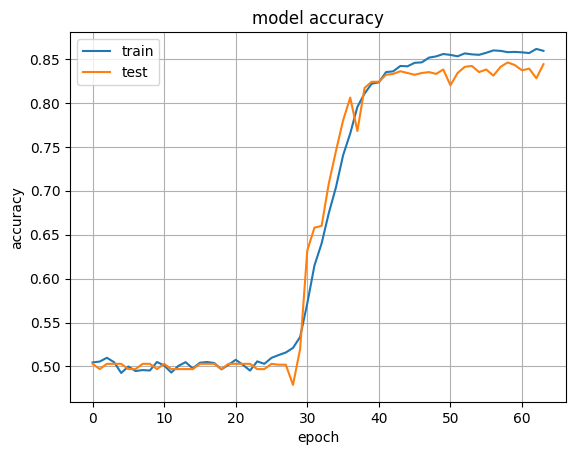

In [78]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'test'], loc='upper left')
plt.show()

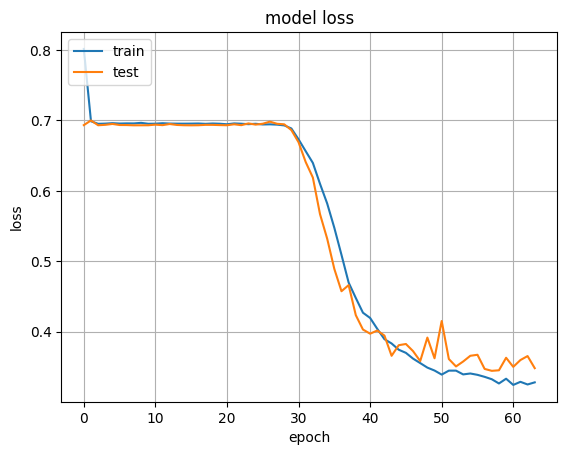

In [79]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [80]:
model.load_weights(filename)
pred_results = model.predict(([inputs_test, queries_test]))

32/32 [==============================] - 0s 2ms/step


In [81]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [82]:
story =' '.join(word for word in test_data[0][0])
print(story)

Mary got the milk there . John moved to the bedroom .


In [83]:
query = ' '.join(word for word in test_data[0][1])
print(query)

Is John in the kitchen ?


In [84]:
print("True Test Answer from Data is:",test_data[0][2])

True Test Answer from Data is: no


In [85]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.9977147


In [86]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [87]:
# Note the whitespace of the periods
my_story = "John left the kitchen . Sandra dropped the football in the garden ."
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [88]:
my_question = "Is the football in the garden ?"

In [89]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [90]:
mydata = [(my_story.split(),my_question.split(),'yes')]

In [91]:
my_story,my_ques,my_ans = vectorize_stories(mydata)

In [92]:
pred_results = model.predict(([ my_story, my_ques]))

1/1 [==============================] - 0s 30ms/step


In [93]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])
for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key
print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.93701637
